# Stock Market Prediction Using LSTM By Shantanu Garain

# Importing Essential Libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data to the notebook

In [20]:
data = pd.read_csv('aapl_raw_data.csv')

# Looking for top 5 Rows of our dataset

In [ ]:
data.head()

# Looking for bottom 5 Rows of our dataset

In [22]:
data.tail()

# Size of our data

In [23]:
data.size

88227

# Shape of our data

In [24]:
data.shape

(9803, 9)

# Some important information about the columns of our data

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            9803 non-null   object 
 1   open            9803 non-null   float64
 2   high            9803 non-null   float64
 3   low             9803 non-null   float64
 4   close           9803 non-null   float64
 5   volume          9803 non-null   int64  
 6   adjusted_close  9803 non-null   float64
 7   change_percent  9802 non-null   float64
 8   avg_vol_20d     9784 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 689.4+ KB


# Some statistical information about the data:

In [26]:
data.describe()

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
count,9803.000000,9803.000000,9803.000000,9803.000000,9.803000e+03,9803.000000,9802.000000,9.784000e+03
mean,121.004966,122.456075,119.470947,121.002267,2.047305e+07,20.204214,0.115409,3.444902e+08
std,135.119023,136.267710,133.813208,135.076731,2.781417e+07,41.263009,2.726494,2.753198e+08
min,12.874400,13.190800,12.720400,12.936000,9.600000e+04,0.050200,-51.870000,4.981285e+07
25%,34.501600,35.000000,33.751200,34.501600,1.909849e+06,0.278900,-1.230000,1.534639e+08
50%,61.600000,62.748000,60.625600,61.751200,8.465999e+06,0.779200,0.020000,2.480744e+08
75%,154.675000,156.390000,153.070000,154.600000,2.843074e+07,18.431250,1.430000,4.429121e+08
max,702.410000,705.070000,699.570000,702.100000,3.326072e+08,196.185100,33.200000,1.879209e+09


# DATA PREPROCESSING AND DATA CLEANING:

# Null values in each column:

In [27]:
data.isnull().sum()

date               0
open               0
high               0
low                0
close              0
volume             0
adjusted_close     0
change_percent     1
avg_vol_20d       19
dtype: int64

# Check duplicate and remove them

In [28]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

# Data Transformation

In [29]:
# check the data types of the solumns
data.dtypes

date               object
open              float64
high              float64
low               float64
close             float64
volume              int64
adjusted_close    float64
change_percent    float64
avg_vol_20d       float64
dtype: object

In [30]:
# Change the 'date' format to datetime format
data['date'] = pd.to_datetime(data['date'])
data.dtypes

date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
volume                     int64
adjusted_close           float64
change_percent           float64
avg_vol_20d              float64
dtype: object

# Feature Engineering

In [31]:
def add_features(data):
    
    # add day of the week feature
    data['day_of week'] = data['date'].dt.dayofweek
    
    # add month feature
    data['month'] = data['date'].dt.month
    
    # Add year feature
    data['year'] = data['date'].dt.year
    
    # Add week of the year feature
    data['week_of_year'] = data['date'].dt.isocalendar().week
    
    # Add day of the year feature
    data['day_of_year'] = data['date'].dt.dayofyear
    
    return data

In [32]:
df = add_features(data)
df.head()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d,day_of week,month,year,week_of_year,day_of_year
0,1984-11-05,24.7520,25.3792,24.5056,24.7520,470399,0.0856,NaN,NaN,0,11,1984,45,310
1,1984-11-06,26.2528,26.3760,24.9984,26.2528,1005899,0.0908,6.07,NaN,1,11,1984,45,311
2,1984-11-07,25.7488,26.3760,24.8752,25.7488,1033699,0.0891,-1.87,NaN,2,11,1984,45,312
3,1984-11-08,24.7520,25.7488,24.6288,24.7520,393399,0.0856,-3.93,NaN,3,11,1984,45,313
4,1984-11-09,23.2512,24.8752,23.0048,23.2512,1313099,0.0804,-6.07,NaN,4,11,1984,45,314


In [33]:
df.corr()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d,day_of week,month,year,week_of_year,day_of_year
date,1.000000,0.563895,0.563937,0.564516,0.564302,0.704164,0.676749,0.003907,0.028803,0.004075,0.003340,0.999674,0.003132,0.003341
open,0.563895,1.000000,0.999914,0.999887,0.999802,0.220890,0.252259,0.003715,0.110114,0.004424,-0.012036,0.564063,-0.012406,-0.011722
high,0.563937,0.999914,1.000000,0.999860,0.999905,0.222368,0.252422,0.007143,0.111613,0.003533,-0.012402,0.564115,-0.012777,-0.012076
low,0.564516,0.999887,0.999860,1.000000,0.999899,0.219083,0.253012,0.007743,0.107308,0.004137,-0.011961,0.564681,-0.012347,-0.011628
close,0.564302,0.999802,0.999905,0.999899,1.000000,0.220718,0.252873,0.012879,0.109400,0.003385,-0.012248,0.564475,-0.012654,-0.011927
volume,0.704164,0.220890,0.222368,0.219083,0.220718,1.000000,0.748368,-0.018281,-0.007536,0.012004,-0.002384,0.704051,-0.000948,-0.002202
adjusted_close,0.676749,0.252259,0.252422,0.253012,0.252873,0.748368,1.000000,0.001316,-0.343451,0.002525,0.002997,0.676509,0.002119,0.002869
change_percent,0.003907,0.003715,0.007143,0.007743,0.012879,-0.018281,0.001316,1.000000,0.003203,-0.026812,-0.008284,0.004155,-0.007758,-0.009768
avg_vol_20d,0.028803,0.110114,0.111613,0.107308,0.109400,-0.007536,-0.343451,0.003203,1.000000,0.001283,-0.048346,0.030022,-0.046019,-0.047586
day_of week,0.004075,0.004424,0.003533,0.004137,0.003385,0.012004,0.002525,-0.026812,0.001283,1.000000,-0.012933,0.004401,-0.014745,-0.012796


# EXPLORATORY DATA ANALYSIS

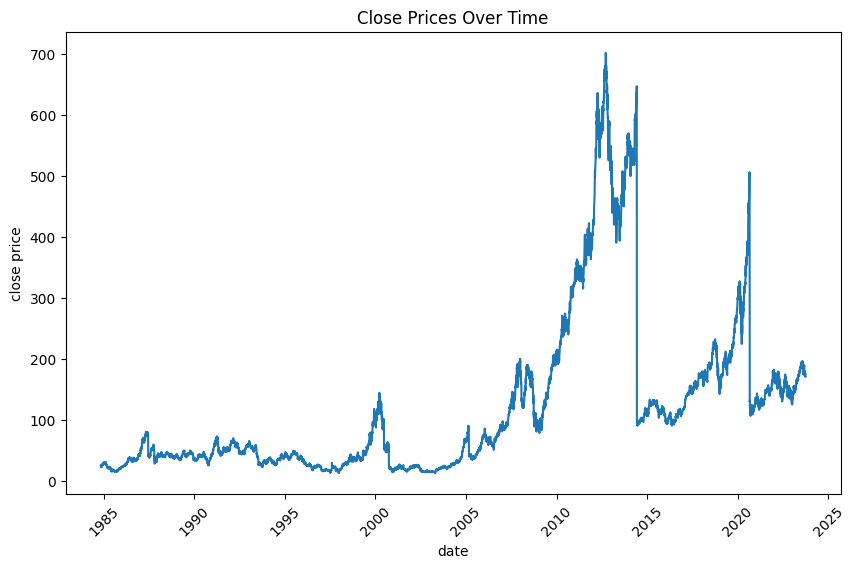

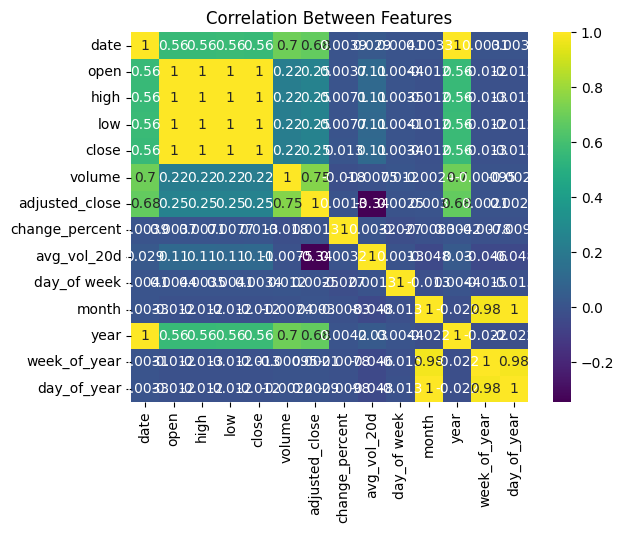

In [34]:
plt.figure(figsize=(10, 6))

# Line plot of close prices over time
sns.lineplot(data=df, x='date', y='close')
plt.title('Close Prices Over Time')
plt.xlabel('date')
plt.ylabel('close price')
plt.xticks(rotation=45)
plt.show()

# Heatmap of correlation between features
corr = df.corr()
#sns.heatmap(corr, cmap='coolwarm', annot=True)
sns.heatmap(corr, cmap='viridis', annot=True)
plt.title('Correlation Between Features')
plt.show()

# LSTM Model

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler

In [36]:
# Create new dataframe with Close column
data = df.filter(['close'])
# Convert it with numpy array
dataset = data.values
# Get the number of rows to train the model on
len_train_data = int(np.ceil(len(dataset) * .95))

len_train_data

9313

# Normalizing Data

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

trained_scaled_data = scaler.fit_transform(dataset)

trained_scaled_data

array([[0.01714541],
       [0.01932312],
       [0.0185918 ],
       ...,
       [0.23074914],
       [0.22852906],
       [0.22890633]])

# Creating the training data set

In [38]:
train_data = trained_scaled_data[0:int(len_train_data), :]

# Now splitting the data into x_train, y_train

In [39]:
# Splitting the data into x_train, y_train

x_train, y_train = [], []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if(i<=61):
        print(x_train)
        print(y_train)
        print()
        
# Convert train data to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshapping our new data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.01714541, 0.01932312, 0.0185918 , 0.01714541, 0.0149677 ,
       0.01623532, 0.01532523, 0.01569902, 0.01569902, 0.0149677 ,
       0.01296876, 0.01405761, 0.01478893, 0.01569902, 0.01605656,
       0.01696664, 0.01877057, 0.0180555 , 0.01714541, 0.01659286,
       0.01732418, 0.01914435, 0.02094828, 0.02076951, 0.02003819,
       0.01950189, 0.01823427, 0.0185918 , 0.01950189, 0.02041198,
       0.02276846, 0.02112705, 0.02094828, 0.02041198, 0.02112705,
       0.02132207, 0.02150083, 0.02294722, 0.02348352, 0.0216796 ,
       0.02239467, 0.02239467, 0.0222159 , 0.02185837, 0.02294722,
       0.0247674 , 0.02439361, 0.02566124, 0.0247674 , 0.02512493,
       0.02203713, 0.02276846, 0.02367854, 0.02494617, 0.02421485,
       0.02330476, 0.02421485, 0.02512493, 0.02457238, 0.02457238])]
[0.023304757648397192]

[array([0.01714541, 0.01932312, 0.0185918 , 0.01714541, 0.0149677 ,
       0.01623532, 0.01532523, 0.01569902, 0.01569902, 0.0149677 ,
       0.01296876, 0.01405761, 0.0

In [40]:
x_train.shape

(9253, 60, 1)

# Modelling

In [41]:
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

In [42]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.add(Activation('linear'))

# Compile the model
model.compile( optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=14)

Epoch 1/14
290/290 [==============================] - 40s 103ms/step - loss: 0.0014
Epoch 2/14
290/290 [==============================] - 31s 107ms/step - loss: 4.3020e-04
Epoch 3/14
290/290 [==============================] - 32s 111ms/step - loss: 3.6839e-04
Epoch 4/14
290/290 [==============================] - 32s 111ms/step - loss: 3.0675e-04
Epoch 5/14
290/290 [==============================] - 32s 110ms/step - loss: 2.6065e-04
Epoch 6/14
290/290 [==============================] - 31s 108ms/step - loss: 2.4994e-04
Epoch 7/14
290/290 [==============================] - 31s 106ms/step - loss: 2.0885e-04
Epoch 8/14
290/290 [==============================] - 31s 106ms/step - loss: 2.1729e-04
Epoch 9/14
290/290 [==============================] - 26s 91ms/step - loss: 1.9912e-04
Epoch 10/14
290/290 [==============================] - 32s 109ms/step - loss: 1.7434e-04
Epoch 11/14
290/290 [==============================] - 33s 114ms/step - loss: 1.9377e-04
Epoch 12/14
290/290 [==============

# Prediction

In [43]:
# Creating Test Data
test_data = trained_scaled_data[len_train_data - 60: , :]

# Create the datasets x_test and y_test
x_test = []
y_test = dataset[len_train_data:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert data into numpy array
x_test = np.array(x_test)

In [44]:
x_test

array([[0.19679496, 0.1974189 , 0.19419761, ..., 0.18569455, 0.18983   ,
        0.19139711],
       [0.1974189 , 0.19419761, 0.19160026, ..., 0.18983   , 0.19139711,
        0.19387838],
       [0.19419761, 0.19160026, 0.19255794, ..., 0.19139711, 0.19387838,
        0.19708516],
       ...,
       [0.26268639, 0.26049532, 0.25885566, ..., 0.23360768, 0.23485556,
        0.2367274 ],
       [0.26049532, 0.25885566, 0.25955215, ..., 0.23485556, 0.2367274 ,
        0.23074914],
       [0.25885566, 0.25955215, 0.25791249, ..., 0.2367274 , 0.23074914,
        0.22852906]])

In [45]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [46]:
# Predict price
predict_price = model.predict(x_test)
# inverse transform for getting back all normal values from scaled values
predict_price = scaler.inverse_transform(predict_price)

16/16 [==============================] - 2s 52ms/step


In [47]:
rmse = np.sqrt(np.mean(((predict_price - y_test) ** 2)))
rmse

4.3147655782417305

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predict_price, color = 'green', label = 'Predict Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

## As we can see from the above graph that there is very less loss between predicted and original data

# Conclusion

In this project, we analyzed and predicted the stock price on the apple dataset. We startde with step by step process with preprocessing, data cleaning, feature engineering to extract usefull Information from our raw dataset. After that we perform exploratory data analysis to understand the relationships between the features and target variable.

Our model is based on LSTM model.